Améliorations ou essais à réaliser :

1.   Optimisation permanente DataClean
2.   Tests Kmeans sur mail initial, NER, best_summary





Commentaires 29/08/2022 :

*   Partie CountVectorizer supprimée (et transférée dans notebook 4)



# Chargement data

> ATTENTION : (exécuter environnement Franck OU environnement Nicolas)



Environnement Franck (MacOS local)

In [ ]:
import pandas as pd
# Pour limiter les temps de calcul on travaille uniquement sur les 'nrows' premiers mails
file = "/Users/franckglastre/emaildata_100000_0.csv"
df = pd.read_csv(file, nrows=200)
#df = pd.read_csv("emaildata_100000_0.csv", nrows=200)


Environnement Nicolas (Colab) - Choisir entre :

*   Bloc 1 : Génération d'un fichier csv "aléatoire" à partir du csv initial (479Mo)
*   Bloc 2 : On repart du dernier csv généré pour (par exemple) réexecuter le data cleaning
original (sans doublons)





In [1]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import random

file_path = "/content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/"

Mounted at /content/drive


Bloc 1

In [13]:
# CHOISIR entre Bloc 1 et Bloc 2 selon que l'on veut regénérer (Bloc 1) ou pas (Bloc 2) un fichier csv initial
# Enlever ou Mettre en commentaires selon le choix
#
# Bloc 1 -------------------------------------------------------------------------------------------------
#
s = 1000 #desired sample size

file_name = "enron_unique"
file_name_out = file_name+'_'+str(s)
file = file_path+file_name+'.csv'

n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
print(n,' records')
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(file, skiprows=skip)
print(df.shape)

227032  records
(1000, 5)


Bloc 2

In [2]:
# Bloc 2 -------------------------------------------------------------------------------------------------
#
file_name = "enron_output_10000"
file_name_out = file_name+'_bis'
file = file_path+file_name+'.csv'
df = pd.read_csv(file)

Noyau commun

In [14]:
df.head()

,date,from,to,header,body
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ..."
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro..."
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl..."
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h..."
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT..."


# Modification structures

In [15]:
print('Fichier de départ : ',file)

df['cc'] = ''                        # pour identfication des personnes en copie
df['NER_header'] = ''                # Spacy NER
df['NER_body'] = ''                  # Spacy NER
df['body_clean'] = ''                # body sans caracteres parasites V1
df['body_principal'] = ''            # mail INITIAL seulement
df['body_dict'] = ''                 # body tokenisé
# df['summary_TFIDF'] = ''             # extractive summary by TF-IDF
# df['summary_TFIDF_sim'] = ''         # calcul de similarité par rapport à body_clean
# df['summary_spacy'] = ''             # extractive summary by Spacy
# df['summary_spacy_sim'] = ''         # calcul de similarité par rapport à body_clean
# df['summary_BART'] = ''              # abstractive summary by HugginFace/BART
# df['summary_BART_sim'] = ''          # calcul de similarité par rapport à body_clean
# df['summary_T5'] = ''                # abstractive summary by HugginFace/T5
# df['summary_T5_sim'] = ''            # calcul de similarité par rapport à body_clean
# df['best_sim'] = ''                  # meilleure taux de similarité par rapport à body_clean

df.tail(10)
deb = 0
fin = df.shape[0]
print(deb,fin)

print(file_name_out)


Fichier de départ :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_unique.csv
0 1000
enron_unique_1000


# Fonction - Sauvegarde vers CSV

In [16]:
# SAUVEGARDE en csv du résultat.
def svgd_csv_xls (file_path,file_name):

# to .CSV
  file_extension = ".csv"
  file = file_path+file_name+file_extension
  print("File : ",file)
  df.to_csv(file, encoding='utf-8', index=False)
# df[deb:fin].to_csv(file, encoding='utf-8', index=False)
  print("Svgde effectuée")
  return


# Analyse exploratoire des datas (1)

> Bloc en retrait



In [17]:
df = df.rename(columns={'sender': 'from', 'recipient1': 'to','subject': 'header', 'text': 'body'})
df.head(5)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ...",,,,,,
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro...",,,,,,
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl...",,,,,,
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h...",,,,,,
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT...",,,,,,


In [18]:
#pas de données quantitatives, pas de renseignement ici....
df.describe()

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict
count,1000,1000,1000,976,1000,1000,1000,1000,1000,1000,1000
unique,997,560,641,925,1000,1,1,1,1,1,1
top,2001-05-07 09:00:00-07:00,pete.davis@enron.com,pete.davis@enron.com,RE:,"['', '', '---------------------- Forwarded by ...",,,,,,
freq,2,46,46,26,1,1000,1000,1000,1000,1000,1000


In [19]:
# identification des valeurs manquantes
# ici, nombreux headers (Sujectà) manquants
info_manq = df.isnull().sum()
print(info_manq)

date               0
from               0
to                 0
header            24
body               0
cc                 0
NER_header         0
NER_body           0
body_clean         0
body_principal     0
body_dict          0
dtype: int64


In [20]:
# période couverte de la base d'email
df['Datetime']=df['date'].apply(lambda x:x[:10])
df['Datetime'] = pd.to_datetime(df['Datetime'],format="%Y/%m/%d")
print("années: ",df['Datetime'].dt.year.unique())
print("mois: ",df['Datetime'].dt.month.unique())
print("jours: ",df['Datetime'].dt.day.unique())

années:  [2001 2000 2002 1999 1979]
mois:  [ 4  2 10  5  3 11  8 12  7  6  1  9]
jours:  [24 16 22 18 23 29  5 30 14 11 10 20 26 19 28 27  7  4 21  9 15 31  1  3
 12 13 25 17  8  6  2]


In [21]:
# répartition des emails
print(df.groupby([df['Datetime'].dt.year])['date'].aggregate('count'))
print(df.groupby([df['Datetime'].dt.year,df['Datetime'].dt.month])['date'].aggregate('count'))

Datetime
1979      1
1999     20
2000    271
2001    597
2002    111
Name: date, dtype: int64
Datetime  Datetime
1979      12            1
1999      1             2
          3             1
          6             1
          7             2
          8             3
          9             3
          10            1
          11            6
          12            1
2000      1             8
          2            17
          3            10
          4            20
          5            13
          6            18
          7            19
          8            23
          9            28
          10           39
          11           37
          12           39
2001      1            25
          2            34
          3            42
          4            74
          5            60
          6            48
          7            42
          8            34
          9            25
          10          107
          11           69
          12           37
200

# Fonction : selection de l'email INITIAL

In [22]:
# fonction pour sélectionner uniquement l'email principal, et éliminer les forwards suivants

def sel_email_principal(df):
    import re
    result = re.finditer(r'\'-+ Forwarded by.{,700}Subject:', df)
    # print all match object
    deb=0
    fin=0
    texte=""
    liste=[]
    for match_obj in result:
        liste.append(match_obj.span())
    if len(liste)==0:
        return df
    if len(liste)==1:
        deb=int(liste[0][0])
        fin=int(liste[0][1])
        return df[fin:]
    if len(liste)>1:
        fin=int(liste[0][1])
        deb=int(liste[1][0])
        return df[fin:deb]

Execution : selection email initial

In [23]:
# création d'un colonne email uniquement avec l'email principal

df['body_principal'] = df['body'].apply(lambda d:sel_email_principal(d))
df.head()
df[['date','body','body_principal']].head(14)

,date,body,body_principal
0,2001-04-24 12:27:00-07:00,"['', '', '---------------------- Forwarded by ...","\t', '', 'FYI, ', '?\tSelling 500/d of SoCal, ..."
1,2001-02-16 00:52:00-08:00,"['', 'Jeff,', '', 'Here is the application fro...","RE:', '', '', 'I was told that you were faxed..."
2,2001-10-22 11:29:43-07:00,"['', 'If you cannot read this email, please cl...","['', 'If you cannot read this email, please cl..."
3,2001-10-22 20:58:34-07:00,"['', '[IMAGE]', ""If you can't see this click h...","['', '[IMAGE]', ""If you can't see this click h..."
4,2001-10-18 00:41:45-07:00,"['', '<!--To put this html into an existing HT...","['', '<!--To put this html into an existing HT..."
5,2001-10-23 15:14:37-07:00,"['', 'There are three other deals that I will ...","['', 'There are three other deals that I will ..."
6,2001-05-29 05:04:48-07:00,"['', 'Please remove from email.', '', 'Phillip...","['', 'Please remove from email.', '', 'Phillip..."
7,2001-03-05 23:43:00-08:00,"['', '---------------------- Forwarded by John...","Enron Mentions - 03-04-01', '', 'Utility Dere..."
8,2000-11-30 09:43:00-08:00,"['X-Origin: ARNOLD-J', 'X-FileName: jarnold.ns...","['X-Origin: ARNOLD-J', 'X-FileName: jarnold.ns..."
9,2001-05-14 16:03:00-07:00,"['', 'i am open to any of your wonderful ideas...","['', 'i am open to any of your wonderful ideas..."


# Data Cleaning

Fonction : regex

In [24]:

# préparation du corpus de mots avec fonction de nettoyage
# prend une string / retourne une string

import re
def data_cleanstr(string):
    r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
    tok=r.sub('mail', string)
    
    r = re.compile(r"([^a-zA-Z\.$]+)")
    tok1=r.sub(' ', tok)
    return tok1
    



Execution Regex

In [25]:
df['body_principal'] = df['body_principal'].apply(lambda d:data_cleanstr(d))


In [26]:
print(df.iloc[9,]['body'])
print("   ")
print(df.iloc[9,]['body_principal'])


['', 'i am open to any of your wonderful ideas.  new orleans..1..2...out', '', '', '', '-----Original Message-----', 'From: John.Arnold@enron.com [mailto:John.Arnold@enron.com]', 'Sent: Monday, May 14, 2001 10:01 PM', 'To: epao@mba2002.hbs.edu', 'Subject: Re: Defense', '', '', '', 'maine impossible to get to ..    next idea?', '', '']
   
 i am open to any of your wonderful ideas. new orleans.. .. ...out Original Message From mail mailto mail Sent Monday May PM To mail Subject Re Defense maine impossible to get to .. next idea 


Fonction : StopWords

In [27]:
# préparation fonction stopwords
# prend une string / retourne une string


def remove_stop_words(text):
    import spacy
    from spacy.lang.en.stop_words import STOP_WORDS
    stopwords=list(STOP_WORDS)
    lst=[]

    for token in text.split():
        if token.lower() not in stopwords:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
            result = ' '.join(lst)
    return result

Fonction : Tokenisation et lower()

In [28]:


# tokenisation du corpus de mots, utilisation de la fonction de nettoyage et mise en minuscules
# prend retourne un dataframe / retourne une liste

import nltk
nltk.download('punkt')

def tokenize_mots(df):    
    texte=[]
    phrases=""
    from nltk.tokenize import word_tokenize

    for i in df['body_principal']:
        phrases+=i  
    a=data_cleanstr(str(phrases))
    mots=word_tokenize(a)
    mots=[i.lower() for i in mots]
    return mots



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Execution : Tokenisation et lower() 

In [29]:
# création liste mots pour corpus
mots=tokenize_mots(df)



Execution StopWords

In [30]:
# création liste mots pour corpus sans Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
mots_sans=[]
for mot in mots:
    if mot not in stopwords:
        mots_sans.append(mot)
    

print(len(mots))
print(len(mots_sans))

248272
157210


Fonction : Lemmatization

In [31]:
# lematisation du corpus, 2 ere ligne à réactiver si besoin
# prend une liste / retourne une liste

import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

def lematize_mots(corpus):
    from nltk.stem import WordNetLemmatizer

    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corp=[]
    for mot in corpus:
        a=""
        a=wordnet_lemmatizer.lemmatize(mot)
        corp.append(a)
    #utilisation de list(set()) pour supprimer les doublons
    return list(set(corp))




[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Execution : Lemmatization

In [32]:
# création liste pour corpus
corpus=lematize_mots(mots)
corpus_sans=lematize_mots(mots_sans)

print(len(corpus))
print(len(corpus_sans))

16174
15931


Fonction : suppression des Noms de personnes (NER Spacy)

In [33]:
# fonction pour enlever les noms
#Entrée liste / Sortie liste

def remove_nom(corpus):
    import spacy
    # mise en minuscule du texte
    text=[t.lower() for t in corpus]
    # création d'un string pour préparation spacy
    text=" ".join(text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    # création d'une liste de nom sur la base des NER Person de Spacy
    personne = [e.text for e in doc.ents if e.label_=='PERSON']
    lst=[]
    # parcours du texte issu de doc pour neutraliser les Persons
    texte=[token.text for token in doc]
    for token in texte:
        if token not in personne:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
    return lst



     


Execution : suppression des Noms de personnes (NER Spacy)

In [34]:
corpus_sans=remove_nom(corpus_sans)    

# Vizualisation (WordCloud)

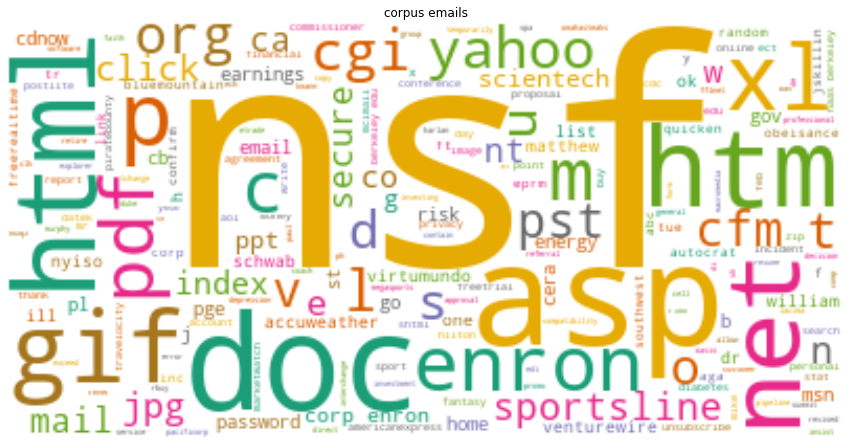

In [36]:
#visualisation nuage
from wordcloud import WordCloud, STOPWORDS

stop_words = STOPWORDS
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
wc.generate(" ".join(corpus_sans))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.title("corpus emails")
    
plt.show()

# Analyse exploratoire des datas (2)

In [47]:
df.head(5)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict,Datetime,longueur_body
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ...",,,,,t FYI tSelling d of SoCal XH lowers overall d...,,2001-04-24,124
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro...",,,,,RE I was told that you were faxed the loan ap...,,2001-02-16,471
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl...",,,,,If you cannot read this email please click he...,,2001-10-22,18317
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h...",,,,,IMAGE If you can t see this click here t Ulti...,,2001-10-22,912
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT...",,,,,To put this html into an existing HTML docume...,,2001-10-18,5343


,longueur_body
count,1000.000000
mean,1351.278000
std,2732.352643
min,4.000000
25%,268.750000
50%,674.000000
75%,1385.000000
max,41002.000000


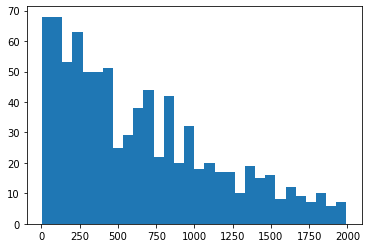

In [38]:
import matplotlib.pyplot as plt
# distribution longueur d'emails
df['longueur_body']=df['body_principal'].apply(lambda x:len(x))
# distribution de la longueur des emails
plt.hist(df[df['longueur_body']<2000]['longueur_body'],bins=30);
# statistique sur la longueur des emails
df.describe()  

In [39]:
df[df['longueur_body']>2000]['body_principal'].count()
df[df['longueur_body']>2000]['body_principal'].head(1)

2     If you cannot read this email please click he...
Name: body_principal, dtype: object

In [40]:
# distribution des emails par auteur
print(df["from"].value_counts())
print("  ")
print("nombre de correspondants :",len(df["from"].unique()))

pete.davis@enron.com                      46
sara.shackleton@enron.com                 22
jeff.dasovich@enron.com                   19
tana.jones@enron.com                      16
vince.kaminski@enron.com                  15
                                          ..
juan.hernandez@enron.com                   1
bible-html@emazing.com                     1
im-urlaub@t-online.de                      1
cdnow_specials.6bfbk47b.r@my.cdnow.com     1
john.zufferli@enron.com                    1
Name: from, Length: 560, dtype: int64
  
nombre de correspondants : 560


In [41]:
# distribution des emails par destinataire
df["to"].value_counts()

pete.davis@enron.com           46
jeff.dasovich@enron.com        15
sara.shackleton@enron.com      13
tana.jones@enron.com           12
gerald.nemec@enron.com         11
                               ..
dmitchel@cwt.com                1
frank.davis@enron.com           1
clickathome.two@enron.com       1
jenny.helton@enron.com          1
nella.cappelletto@enron.com     1
Name: to, Length: 641, dtype: int64

In [42]:
# sujets d'email identique?
print(df["header"].value_counts())
print("nombre de NA :",df["header"].isna().sum()," sur tot de",len(df))

RE:                                                                   26
Re:                                                                   11
Schedule Crawler: HourAhead Failure <CODESITE>                         6
Lunch                                                                  3
Williams Energy News Live -- today's video newscast                    3
                                                                      ..
Energy Customer Management News Alert                                  1
Re: Sun Devil meeting                                                  1
Henwood's Online Applications                                          1
Transwestern Historical Pressures - Kingman                            1
RE: REMINDER - Enron Presentation Re: Financial Planning - Monday,     1
Name: header, Length: 925, dtype: int64
nombre de NA : 24  sur tot de 1000


# Analyse exploratoire des datas (3) - Data Prep

In [44]:
# https://medium.com/towards-data-science/automating-eda-using-dataprep-2b541b6a3149
!pip install -U dataprep
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [ ]:
create_report(df).show_browser()

In [ ]:
plot(df)

In [ ]:
plot_missing(df)

In [ ]:
plot_correlation(df)

Sauvegarde des données nettoyées

In [48]:
file_name

'enron_unique'

In [46]:
file_name_out

'enron_unique_1000'

In [45]:
# Environnement Nicolas
svgd_csv_xls (file_path,file_name_out)

File :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_unique_1000.csv
Svgde effectuée


In [ ]:
# Environnement Franck
df.to_csv(‘/Users/franckglastre/Documents/GitHub/NLP-Datascientest/data_clean.csv’,encoding=‘utf-8’, index=False)